<a href="https://colab.research.google.com/github/vmatiasw/modelos_y_simulacion/blob/main/ejemplo8_3y4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

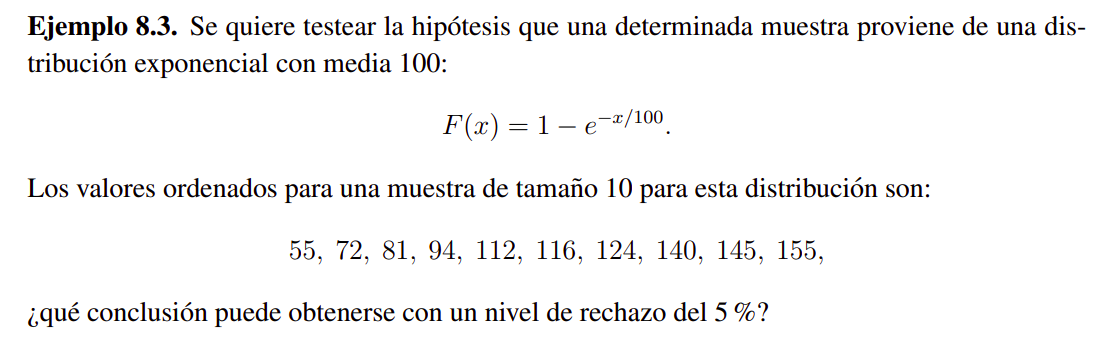

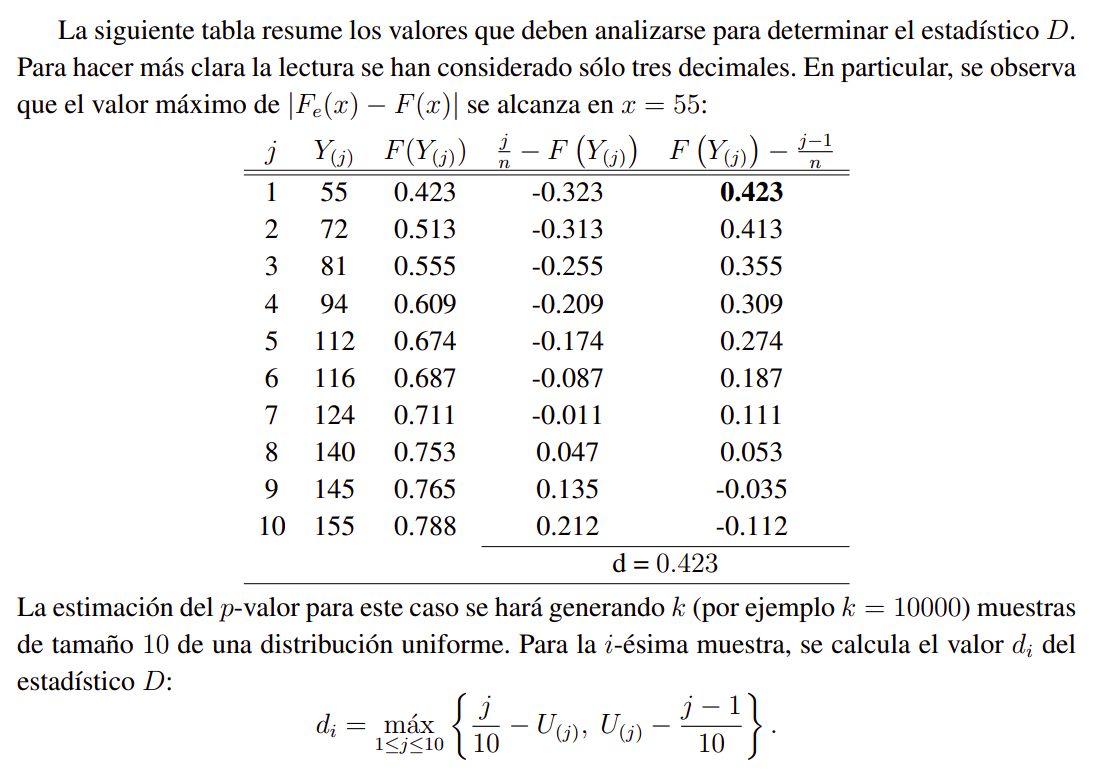

In [10]:
from scipy.stats import chi2
from random import random, seed
import numpy as np

MUESTRA_EMPIRICA = sorted([55, 72, 81, 94, 112, 116, 124, 140, 145, 155])
MEDIA = 100 # ejemplo 8.3
ESTIMADOR_MEDIA = 109.4 # ejemplo 8.4
LAMBDA = 1/MEDIA # cambiar segun corresponda entre los ejemplos
N_SIM = 100_000

n_TAMANO_MUESTRA = len(MUESTRA_EMPIRICA)

def FDA_F_H0(x):
    return 1 - np.exp(-LAMBDA*x)

def muestreador_F():
    return -np.log(1-random())/LAMBDA

def calcular_estadistico_Kolmogorov_Smirnov(muestra, FDA):
    muestra.sort()
    D = 1 / n_TAMANO_MUESTRA - FDA(muestra[0])
    for j, y in enumerate(muestra, start=1):
        D = max(D, j / n_TAMANO_MUESTRA - FDA(y))
        D = max(D, FDA(y) - (j - 1) / n_TAMANO_MUESTRA)
    return D

d_KSconF_empirico = calcular_estadistico_Kolmogorov_Smirnov(MUESTRA_EMPIRICA, FDA_F_H0)
print(f"estadistico d usando F: {d_KSconF_empirico}")

def estimar_Pvalor_KS_conF(n_sim):
    d_KS_mayores_al_empirico = 0
    for _ in range(n_sim):
        F_muestra = [muestreador_F() for _ in range(n_TAMANO_MUESTRA)]
        d = calcular_estadistico_Kolmogorov_Smirnov(F_muestra, FDA_F_H0)
        if d > d_KSconF_empirico:
            d_KS_mayores_al_empirico += 1
    return d_KS_mayores_al_empirico / n_sim

seed(1)
p_valor_estimado = estimar_Pvalor_KS_conF(N_SIM)
print(f"P-valor estimado: {p_valor_estimado}")

estadistico d usando F: 0.42305018961951335
P-valor estimado: 0.03954


In [11]:
def FDA_U01(x):
    return x

def estimar_Pvalor_KS_conU(n_sim):
    d_KS_mayores_al_empirico = 0
    for _ in range(n_sim):
        U_muestra = [random() for _ in range(n_TAMANO_MUESTRA)]
        d_KS = calcular_estadistico_Kolmogorov_Smirnov(U_muestra, FDA_U01)
        if d_KS > d_KSconF_empirico:
            d_KS_mayores_al_empirico += 1
    return d_KS_mayores_al_empirico / n_sim

seed(1)
p_valor_estimado = estimar_Pvalor_KS_conU(N_SIM)
print(f"P-valor estimado: {p_valor_estimado}")

P-valor estimado: 0.03954


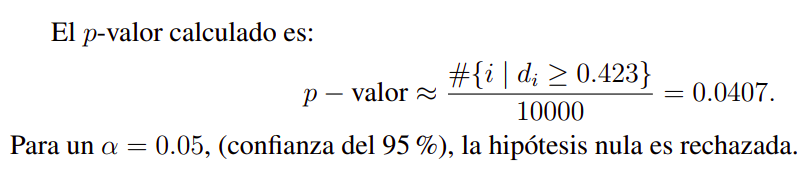

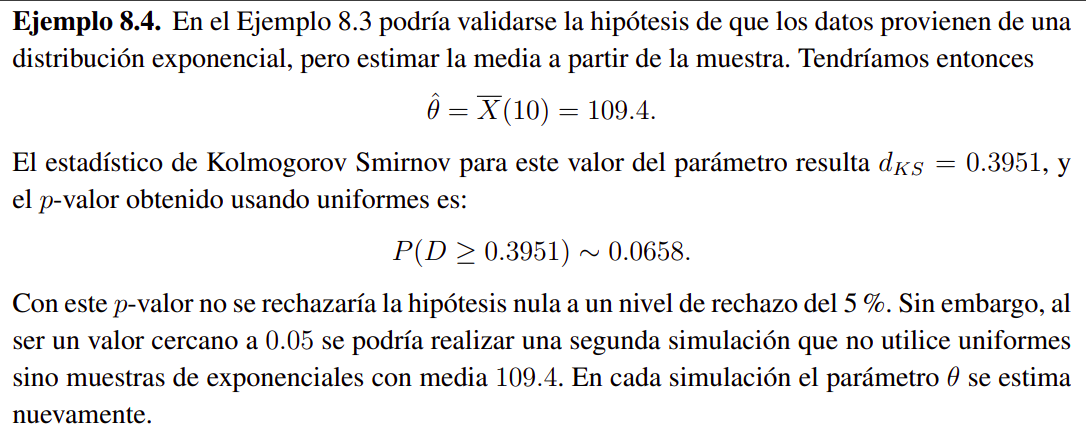

In [12]:
def estimador_l(muestra):
    return 1 / (sum(muestra) / len(muestra))

def estimar_Pvalor_KS_conF_exaustivo(n_sim):
    l_empirico = estimador_l(MUESTRA_EMPIRICA)
    fda_F = FDA_F_H0(l_empirico)
    d_empirico = calcular_estadistico_Kolmogorov_Smirnov(MUESTRA_EMPIRICA, fda_F)

    cuenta = 0
    for _ in range(n_sim):
        F_muestra = [muestreador_F() for _ in range(n_TAMANO_MUESTRA)]

        l_simulada = estimador_l(F_muestra)
        fda_F_simulada = FDA_F_H0(l_simulada)

        d_simulado = calcular_estadistico_Kolmogorov_Smirnov(F_muestra, fda_F_simulada)
        if d_simulado > d_empirico:
            cuenta += 1
    return cuenta / n_sim

seed(1)
p_valor_estimado = estimar_Pvalor_KS_conF(N_SIM)
print(f"P-valor estimado usando F exaustivo: {p_valor_estimado}")

P-valor estimado usando F exaustivo: 0.03954


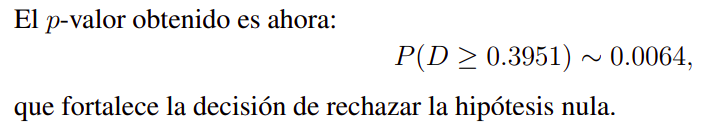